# Bibliotecas e Dataset

In [2]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = load_wine()
X = data.data

In [4]:
X.shape

(178, 13)

In [3]:
y = data.target

# k-Nearest Neighbor

## Acurácia com diferentes valores para k

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

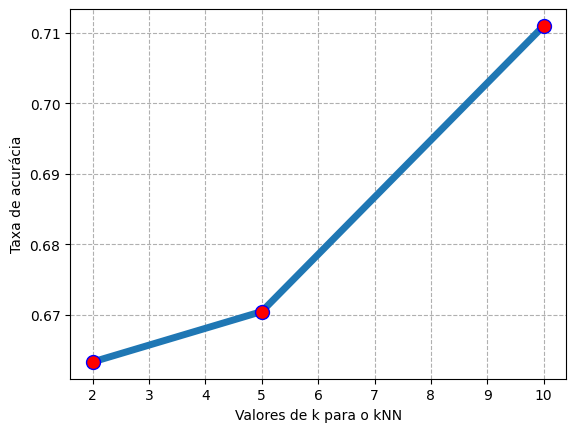

In [5]:
k_values = [2, 5, 10]

k_scores = []

for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(neigh, X_train, y_train, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
    
plt.plot(k_values, k_scores, linewidth = 5.0, marker='o', markersize=10, markeredgecolor='blue', markerfacecolor='red')
plt.xlabel('Valores de k para o kNN')
plt.ylabel('Taxa de acurácia')
plt.grid(linestyle = "dashed")
plt.show()

In [6]:
for i in range(len(k_scores)):
    print("k:", k_values[i],  "Acurácia:", round(k_scores[i],2)*100)

k: 2 Acurácia: 66.0
k: 5 Acurácia: 67.0
k: 10 Acurácia: 71.0


# Random Forest

## Acurácia para diferentes valores de estimadores

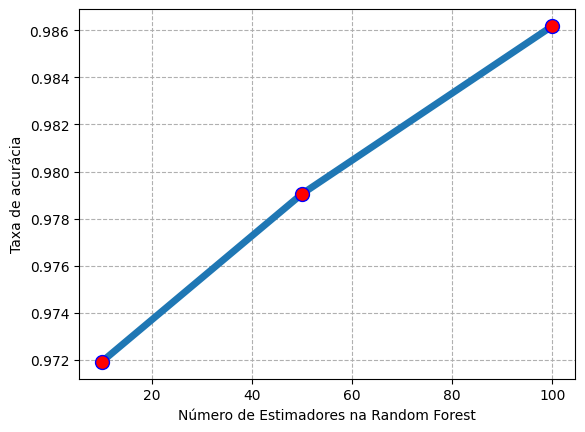

In [7]:
estimators = [10, 50, 100]

s_scores = []

for s in estimators:
    rf = RandomForestClassifier(n_estimators = s, random_state=0)
    scores2 = cross_val_score(rf, X_train, y_train, cv = 10, scoring = 'accuracy')
    s_scores.append(scores2.mean())
    
plt.plot(estimators, s_scores, linewidth=5.0, marker='o', markersize=10, markeredgecolor='blue', markerfacecolor='red')
plt.xlabel('Número de Estimadores na Random Forest')
plt.ylabel('Taxa de acurácia')
plt.grid(linestyle="dashed")
plt.show()

In [8]:
for i in range(len(s_scores)):
    print("k:", estimators[i],  "Acurácia:", round(s_scores[i],2)*100)

k: 10 Acurácia: 97.0
k: 50 Acurácia: 98.0
k: 100 Acurácia: 99.0


## Divisões para diferentes valores de k (K-NN)

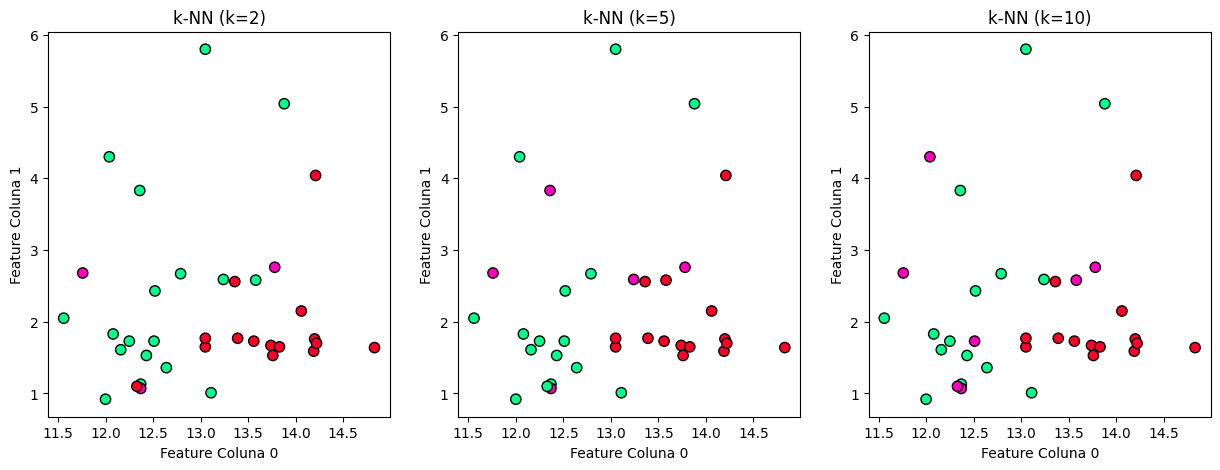

In [9]:
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))


for i, k in enumerate(k_values):
    neigh2 = KNeighborsClassifier(n_neighbors=k)
    neigh2.fit(X_train, y_train)
    y_pred = neigh2.predict(X_test)
    
    
    scatter = axes[i].scatter(
        X_test[:, 0], X_test[:, 1], c=y_pred, cmap='gist_rainbow', edgecolor='k', s=55
    )
    axes[i].set_title(f'k-NN (k={k})')
    axes[i].set_xlabel('Feature Coluna 0')
    axes[i].set_ylabel('Feature Coluna 1')

plt.show()

## Divisões para diferentes valores de s (Random Forest)

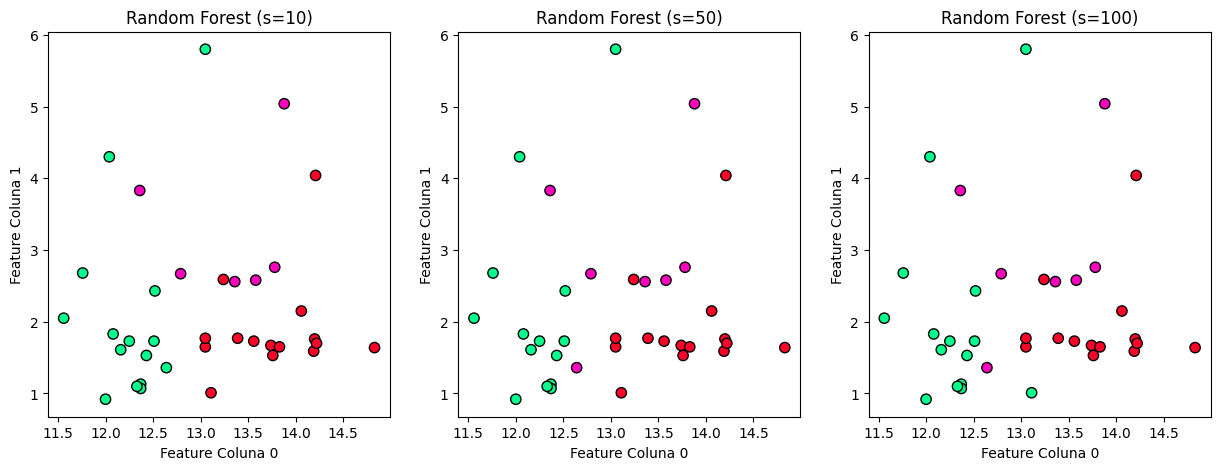

In [10]:
fig, axes = plt.subplots(1, len(estimators), figsize=(15, 5))


for i, s in enumerate(estimators):
    rf2 = RandomForestClassifier(n_estimators = s, random_state=0)
    rf2.fit(X_train, y_train)
    ypred2 = rf2.predict(X_test)
    
    
    scatter = axes[i].scatter(
        X_test[:, 0], X_test[:, 1], c=ypred2, cmap='gist_rainbow', edgecolor='k', s=55
    )
    axes[i].set_title(f'Random Forest (s={s})')
    axes[i].set_xlabel('Feature Coluna 0')
    axes[i].set_ylabel('Feature Coluna 1')

plt.show()

# Análisando o K-nn

" Explique as diferenças encontradas nos resultados dos exercícios 1) e 2) "

In [6]:
import pandas as pd

df = pd.DataFrame(X)
descricao = df.describe()

valores_min = descricao.loc['min']
valores_max = descricao.loc['max']

print("Valores Mínimos:")
print(valores_min)

print("\nValores Máximos:")
print(valores_max)

Valores Mínimos:
0      11.03
1       0.74
2       1.36
3      10.60
4      70.00
5       0.98
6       0.34
7       0.13
8       0.41
9       1.28
10      0.48
11      1.27
12    278.00
Name: min, dtype: float64

Valores Máximos:
0       14.83
1        5.80
2        3.23
3       30.00
4      162.00
5        3.88
6        5.08
7        0.66
8        3.58
9       13.00
10       1.71
11       4.00
12    1680.00
Name: max, dtype: float64


* O algortimo K-NN é sensível a valores de diferentes escalas já que ele se baseia em distâncias para sua classificação e podemos observar que nossas features originalmente possuem uma escala diferente.

In [21]:
# normalizando o dataset

norm = (df - df.min()) / (df.max() - df.min())

X2 = norm

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=0) 

k_scores_norm = []

for k in k_values:
    neigh_norm = KNeighborsClassifier(n_neighbors=k)
    scores_norm = cross_val_score(neigh_norm, X2_train, y2_train, cv = 10, scoring = 'accuracy')
    k_scores_norm.append(scores_norm.mean())

In [22]:
# calculando a acurácia

for i in range(len(k_scores_norm)):
    print("k:", k_values[i],  "Acurácia:", round(k_scores_norm[i],2)*100)

k: 2 Acurácia: 96.0
k: 5 Acurácia: 95.0
k: 10 Acurácia: 96.0


* Após aplicarmos o processo de normalização e em seguida o algortimo K-NN, saímos de uma acurácia de 71% para 96% com k = 10

# Analisando o Random Forest

* O Random Forest possui a capacidade de lidar com dados de alta dimensionalidade, como no nosso caso onde temos muitas variáveis preditoras graças a robustez gerada através do processo de Bootstrapping onde o algoritmo cria diferentes variações do nosso dataset original.

Vamos ver o que acontece se reduzirmos a sua robustez criando quantidades menores de árvores

In [23]:
estimators2 = [2,3,4]

s_scores3 = []

for s in estimators2:
    rf2 = RandomForestClassifier(n_estimators = s, random_state=0)
    scores3 = cross_val_score(rf2, X_train, y_train, cv = 10, scoring = 'accuracy')
    s_scores3.append(scores3.mean())

In [24]:
for i in range(len(s_scores3)):
    print("k:", estimators2[i],  "Acurácia:", round(s_scores3[i],2)*100)

k: 2 Acurácia: 94.0
k: 3 Acurácia: 96.0
k: 4 Acurácia: 96.0


* Ao reduzirmos sua robustez, podemos observar que a capacidade do algoritmo também reduz significativamente e se iguala ao K-NN